Import the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy.stats import pearsonr, ttest_ind

Expectations for this part:
- Plot your data in a meaningful way
- Do you have any hypothesis?
- Can you make any kind of prediction: regression and/or classification?

In [2]:
clean_df = pd.read_csv('./clean/clean_measurements.csv')
clean_df

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,refill liters,specials_AC,...,specials_snow,specials_sun,specials_sun ac,gas_type_E10,gas_type_SP98,refill gas_E10,refill gas_None,refill gas_SP98,fuel_efficiency,temp_difference
0,0.124302,0.191011,0.157895,0.384615,0.472222,0,0,0,1.0,False,...,False,False,False,True,False,True,False,False,0.119916,0.485294
1,0.049814,0.101124,0.210526,0.384615,0.500000,0,0,0,0.0,False,...,False,False,False,True,False,False,True,False,0.059972,0.514706
2,0.046089,0.247191,0.315789,0.384615,0.555556,0,0,0,0.0,False,...,False,False,False,True,False,False,True,False,0.042034,0.573529
3,0.054004,0.067416,0.289474,0.384615,0.527778,0,0,0,0.0,False,...,False,False,False,True,False,False,True,False,0.069818,0.544118
4,0.080074,0.134831,0.421053,0.384615,0.555556,0,0,0,0.0,False,...,False,False,False,True,False,False,True,False,0.087377,0.573529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,0.068436,0.044944,0.328947,0.846154,0.638889,0,0,0,0.0,False,...,False,False,False,False,True,False,True,False,0.092037,0.573529
384,0.068901,0.112360,0.315789,0.923077,1.000000,1,0,0,0.0,True,...,False,False,False,False,True,False,True,False,0.079358,0.941176
385,0.068436,0.056180,0.407895,0.923077,0.666667,0,0,0,0.0,False,...,False,False,False,False,True,False,True,False,0.089550,0.588235
386,0.065642,0.146067,0.368421,0.923077,1.000000,1,0,0,0.0,True,...,False,False,False,False,True,False,True,False,0.070696,0.941176


# Plot the dataset

In [3]:
# Plot scatter plot matrix
sns.pairplot(clean_df)
plt.show()

c:\Users\lualg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lualg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lualg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\lualg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

### Hypothesis 1: There is a positive correlation between speed and fuel consumption.

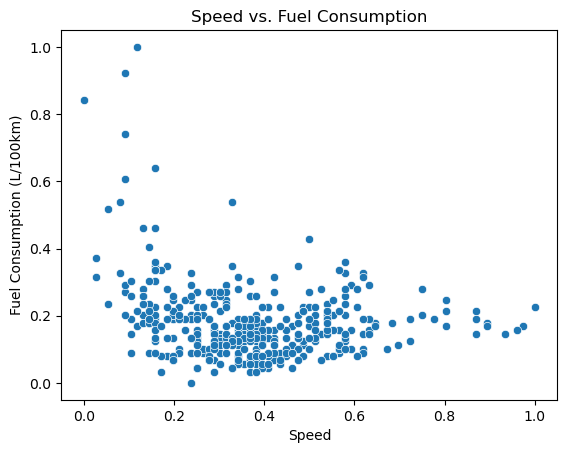

In [4]:
# Hypothesis 1: Speed vs. Fuel Consumption
sns.scatterplot(x='speed', y='consume', data=clean_df)
plt.title('Speed vs. Fuel Consumption')
plt.xlabel('Speed')
plt.ylabel('Fuel Consumption (L/100km)')
plt.show()

In [8]:
speed_fuel_corr, p_value_speed_fuel = pearsonr(clean_df['speed'], clean_df['consume'])
print("Correlation coefficient between speed and fuel consumption:", speed_fuel_corr)
print("p-value:", p_value_speed_fuel)

if p_value_speed_fuel < 0.05:
    print("Reject null hypothesis: There is a significant correlation between speed and fuel consumption.")
else:
    print("Fail to reject null hypothesis: There is no significant correlation between speed and fuel consumption.")

Correlation coefficient between speed and fuel consumption: -0.22786618495972868
p-value: 5.794757744568762e-06
Reject null hypothesis: There is a significant correlation between speed and fuel consumption.


### Hypothesis 2: The presence of air conditioning (AC) increases fuel consumption.

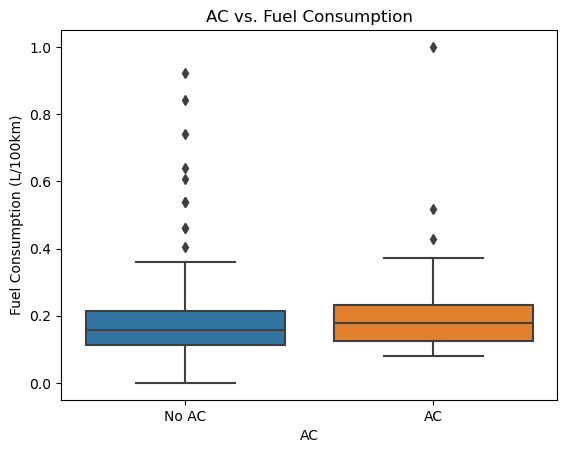

In [5]:
# Hypothesis 2: AC vs. Fuel Consumption
sns.boxplot(x='ac', y='consume', data=clean_df)
plt.title('AC vs. Fuel Consumption')
plt.xlabel('AC')
plt.ylabel('Fuel Consumption (L/100km)')
plt.xticks([0, 1], ['No AC', 'AC'])
plt.show()

In [9]:
no_ac_fuel = clean_df[clean_df['ac'] == 0]['consume']
ac_fuel = clean_df[clean_df['ac'] == 1]['consume']
t_stat, p_value_ac_fuel = ttest_ind(no_ac_fuel, ac_fuel)
print("\nT-statistic for AC vs. Fuel Consumption:", t_stat)
print("p-value:", p_value_ac_fuel)

if p_value_ac_fuel < 0.05:
    print("Reject null hypothesis: Presence of AC significantly increases fuel consumption.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in fuel consumption between cars with and without AC.")


T-statistic for AC vs. Fuel Consumption: -1.9066350212227858
p-value: 0.057310120145949696
Fail to reject null hypothesis: There is no significant difference in fuel consumption between cars with and without AC.


# Modeling

In [6]:
selected_columns = ['distance', 'speed', 'temp_inside', 'temp_outside', 'ac',
                   'rain', 'sun', 'refill liters', 'specials_AC', 'specials_AC Sun',
                   'specials_AC rain', 'specials_AC snow', 'specials_AC sun',
                   'specials_None', 'specials_ac', 'specials_ac rain',
                   'specials_half rain half sun', 'specials_rain', 'specials_snow',
                   'specials_sun', 'specials_sun ac', 'gas_type_E10', 'gas_type_SP98',
                   'refill gas_E10', 'refill gas_None', 'refill gas_SP98',
                   'fuel_efficiency', 'temp_difference']

# Split data into features (X) and target variable (y)
X = clean_df[selected_columns[:-1]]  # Exclude the target variable
y = clean_df['consume']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

R-squared Score: 0.33924068691428355
Mean Squared Error: 0.007568626707056499
Root Mean Squared Error: 0.0869978546118035


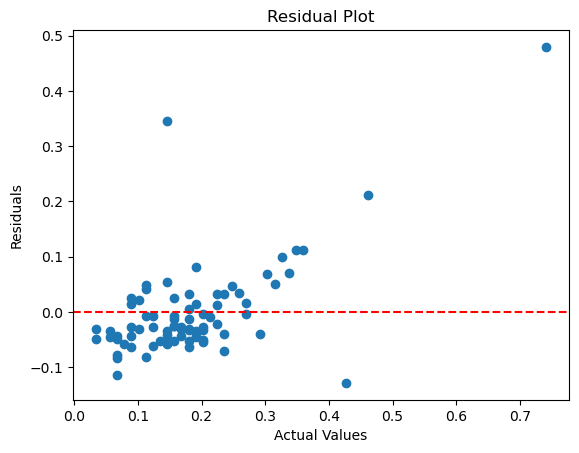

In [7]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.show()